#Laboratorio Divergencia de Kullback-Leibler
__Escuela Tecnológica Instituto Técnico Central__\
__Ingeniería de Sistemas__\
***Electiva  Técnica IV: Ciencia de Datos*** \
*Profesor: Elias Buitrago Bolivar* \

Durante el desarrollo del presente laboratorio se pondrá a prueba el concepto de divergencia de Kullback-Leibler (divergencia KL), mediante casos de uso que permitan entender su aplicabilidad en problemas reales de ciencia de datos. Se inicia contextualizando el conceptos de variables, estadística y probabilidad como marco introductorio. Luego, se describen dos casos de estudio con datos reales en los cuales se aplica la divergencia en KL, incluyendo el respectivo código en Python para resolver. Finalmente, se plantean dos ejercicios con datos reales para resolver siguiendo los casos de uso explicados.  

## Introducción

Si bien este laboratorio no está enfocado estrictamente a estudiar distribuciones de probabilidad, a continuación se brinda una breve contexto, antes de abordar el tópico de interés: la utilidad de la divergencia de Kullback-Leibler.

El análisis de datos moderno, los modelos de aprendizaje automático y las técnicas de inteligencia artificial actuales, tienen un fuerte soporte en la estadística y la probabilidad. Por lo tanto, hablar sobre modelo de aprendizaje, modelos predictivos o prescriptivos, implican repasar conceptos y técnicas estadísticas y probabilísticas, orientadas a explorar y entender el insumo principal: los datos. Los datos, en el argot de la estadística, son variables que representan mediciones o magnitudes cuantitativas de fenómenos físicos tangibles. Al respecto, vale la pena revisar la siguiente argumentación [1]:

*Los valores de una variable sirven para describir o clasificar individuos o distinguir entre ellos. La mayoría de nosotros hacemos algo más que simplemente describir, clasificar o distinguir, porque tenemos ideas respecto a las frecuencias relativas de los valores de una variable. En estadística decimos que la variable tiene una función de probabilidad, una función de densidad de probabilidad o simplemente una función de distribución*. Tomado de [1].

A partir de ese concepto de datos, orientado hacía aplicaciones prácticas, podemos saltar hacía definiciones aplicadas de probabilidad. Y es que existen, diversas funciones matemáticas de probabilidad (conocidas como distribuciones de probabilidad). Por lo tanto, en el contexto de la ciencia de datos surge una pregunta básica: ¿Para que nos sirve determinar la distribución de probabilidad de una variable?  Pues, la utilidad más importante tiene que ver con la posibilidad de  realizar inferencias (predicciones) y tomar decisiones en situaciones de incertidumbre, como lo mencionan [1]:

*Las distribuciones de probabilidad están relacionadas con la distribución de frecuencias. De hecho, podemos pensar en la distribución de probabilidad como una distribución de frecuencias teórica. Una distribución de frecuencias teórica es una distribución de probabilidades que describe la forma en que se espera que varíen los resultados. Debido a que estas distribuciones tratan sobre expectativas de que algo suceda, resultan ser modelos útiles para hacer inferencias y tomar decisiones de incertidumbre*. Tomado de [1].


## Caso de estudio \#1: Evaluación de la Diferencia en el Peso entre Atún y Salmón

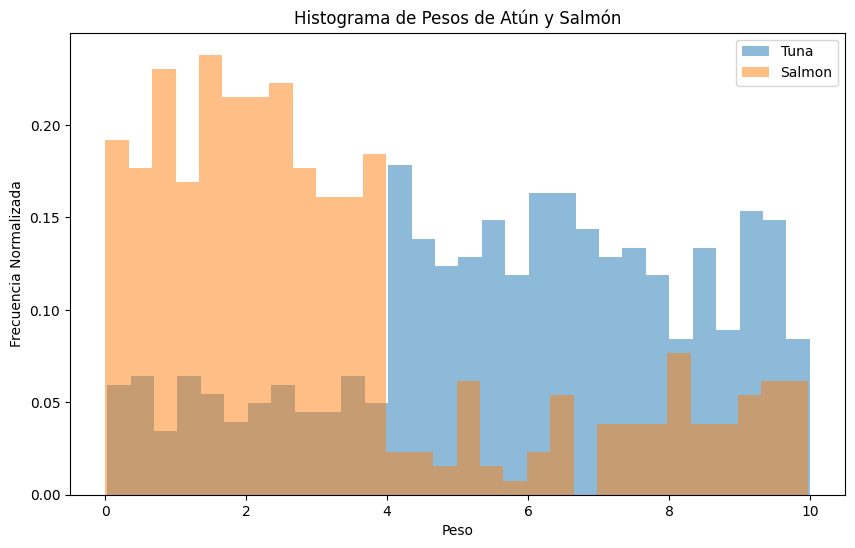

In [4]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy

# Cargar datos desde el enlace CSV
url = "https://github.com/ritvikmath/YouTubeVideoCode/raw/main/fish.csv"
data = pd.read_csv(url)

# Exploración inicial de los datos
plt.figure(figsize=(10, 6))
plt.hist(data[data['type'] == 'tuna']['weight'], bins=30, alpha=0.5, label='Tuna', density=True)
plt.hist(data[data['type'] == 'salmon']['weight'], bins=30, alpha=0.5, label='Salmon', density=True)
plt.title('Histograma de Pesos de Atún y Salmón')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Normalizada')
plt.legend()
plt.show()

Esta gráfica es un histograma que representa la distribución de pesos para las especies Atún (amarillo) y Salmón (azul). Cada barra del histograma representa un intervalo de pesos, y la altura de la barra indica la frecuencia relativa de ocurrencia en ese intervalo. La transparencia (parámetro alpha) se utiliza para visualizar ambas distribuciones superpuestas.

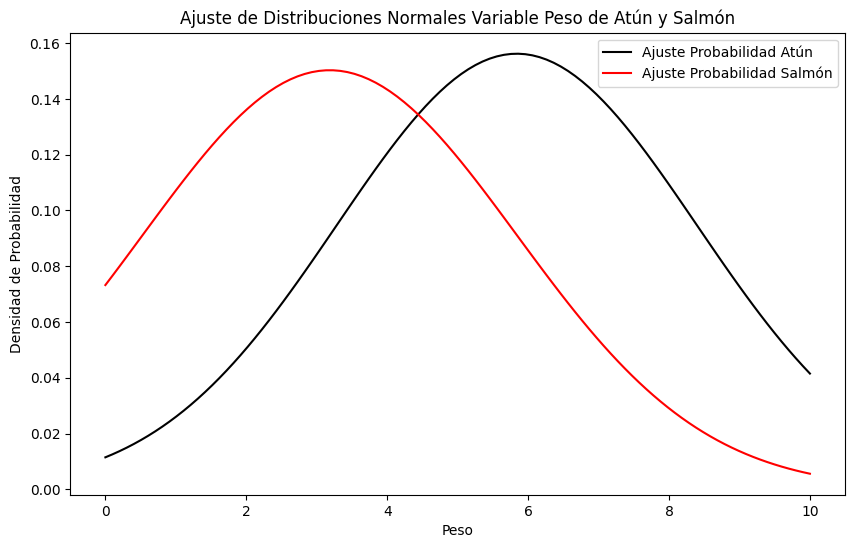

In [6]:
# Ajuste de distribuciones normales a los pesos de cada tipo de pez
mu_atun, std_atun = norm.fit(data[data['type'] == 'tuna']['weight'])
mu_salmon, std_salmon = norm.fit(data[data['type'] == 'salmon']['weight'])

# Visualización de las distribuciones ajustadas
x_peso = np.linspace(data['weight'].min(), data['weight'].max(), 100)
pdf_atun = norm.pdf(x_peso, mu_atun, std_atun)
pdf_salmon = norm.pdf(x_peso, mu_salmon, std_salmon)

plt.figure(figsize=(10, 6))
plt.plot(x_peso, pdf_atun, 'k-', label='Ajuste Probabilidad Atún')
plt.plot(x_peso, pdf_salmon, 'r-', label='Ajuste Probabilidad Salmón')
plt.title('Ajuste de Distribuciones Normales Variable Peso de Atún y Salmón')
plt.xlabel('Peso')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

Esta gráfica muestra el ajuste de distribuciones normales a los datos de pesos de las especies Atún y Salmón. Cada línea representa la función de densidad de probabilidad (PDF) de una distribución normal ajustada a los datos respectivos. El ajuste se realiza para modelar la forma general de la distribución y entender cómo se compara con los datos reales.

In [7]:
# Cálculo de la divergencia Kullback-Leibler
kl_divergence_peso = entropy(pdf_atun, pdf_salmon)
print(f'Divergencia Kullback-Leibler entre Atún y Salmón (Peso): {kl_divergence_peso}')

Divergencia Kullback-Leibler entre Atún y Salmón (Peso): 0.37256656721773607


La divergencia Kullback-Leibler (KL) se calcula al comparar las distribuciones ajustadas (PDF) de los registros históricos de peso del atún y el salmón. Un valor más alto de la divergencia KL indica una mayor diferencia entre las distribuciones. A continuaicón se desglozan las posibilidades de valores que se podrían obtener de la divergencia KL con su correspondiente interpretación.

 * Valor de 0:
        Un valor de 0 indica que las dos distribuciones son idénticas.
        A medida que el valor de la divergencia KL aumenta, la diferencia entre las distribuciones también aumenta.

* Valor obtenido (0.37256656721773607):
        Indica una diferencia, pero no extremadamente grande, entre las distribuciones de los pesos registrados del atún y del salmón.
        Cuanto más cercano a cero, menor es la discrepancia entre las distribuciones.

La divergencia KL puede entenderse como la cantidad promedio de información adicional necesaria para caracterizar la distribución de probabilidad del peso de cada tipo de pescado. Un valor moderado de divergencia KL sugiere que, aunque existen diferencias estadísticas, las distribuciones del peso de ambos tipos de peces comparten ciertas similitudes. Esta conclusión podría indicar que, en términos de peso, las dos especies no muestran diferencias extremas, pero aún exhiben características distintivas que podrían ser pertinentes para la toma de decisiones.

### Ejercicio complementario
Replique el caso de estudio utilizando la variable *longitud*. Visualice las gráficas y proponga conclusiones pertinentes en las cuales discuta el contraste de los resultados de la variable logitud con los resultados obtenidos previamente para el peso de ambos tipos de pescados. Responda las siguientes preguntas:

1. ¿Cuál de las dos vartiables ofrece mejor información?
2. A partir de los resultados con ambas variables, proponga un escenario en el cual esta metodología le puede aportar a la empresa.
3. Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.

## Caso de estudio \#2: Evaluación de la diferencia en el precio y kilometraje de vehículos a la venta

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Cargar los datos desde el repositorio
url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/usedCarsCol_190224_small2Clean.csv"
data = pd.read_csv(url)

data.head()

,car_model,price,year_model,kms
0,Renault Duster Tripadvisor,$64.000.000,2018,37353
1,Renault Duster 1.3 Intens 4x4,$82.900.000,2022,47000
2,Renault Duster 2.0 DYNAMIQUE 2013,$41.000.000,2013,136769
3,Renault Duster 1.6 Expression,$65.000.000,2021,78200
4,Renault Duster 2.0 Dynamique 4x4,$57.500.000,2020,113000


In [27]:
data.dtypes

car_model     object
price         object
year_model     int64
kms            int64
dtype: object

In [29]:
data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True).replace('\.', '', regex=True))
data['price'] = pd.to_numeric(data['price'])
data.dtypes
data.head()

,car_model,price,year_model,kms
0,Renault Duster Tripadvisor,64000000,2018,37353
1,Renault Duster 1.3 Intens 4x4,82900000,2022,47000
2,Renault Duster 2.0 DYNAMIQUE 2013,41000000,2013,136769
3,Renault Duster 1.6 Expression,65000000,2021,78200
4,Renault Duster 2.0 Dynamique 4x4,57500000,2020,113000


In [30]:
# Seleccionar las columnas de interés (price y kms)
columns_comp = ['price', 'kms']
selected_data = data[columns_comp]
selected_data.head()

,price,kms
0,64000000,37353
1,82900000,47000
2,41000000,136769
3,65000000,78200
4,57500000,113000


In [31]:
# Dividir los datos en dos conjuntos: uno para 'price' y otro para 'kms'
price = selected_data['price']
kms = selected_data['kms']

In [32]:
# Para evitar ceros en las distribuciones
pseudocount = 1e-10

# Calcular histogramas normalizados
hist_price, bins_price = np.histogram(data['price'], bins=50, density=True)
hist_kms, bins_kms = np.histogram(data['kms'], bins=50, density=True)

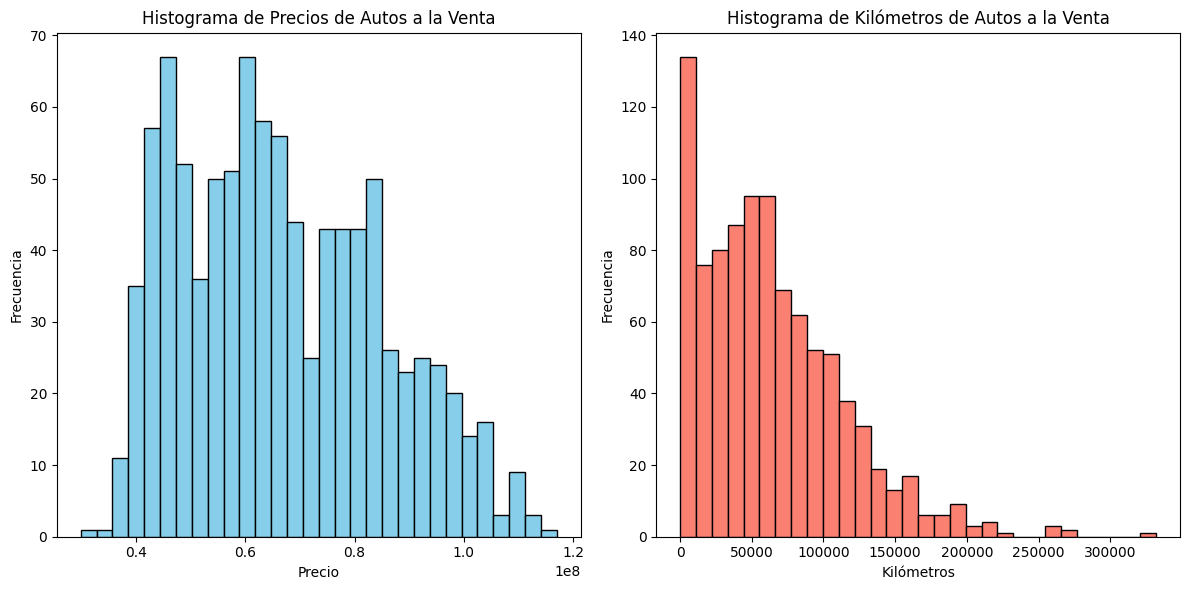

In [33]:
# Graficar histogramas
plt.figure(figsize=(12, 6))

# Histograma de precios
plt.subplot(1, 2, 1)
plt.hist(price, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de Autos a la Venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Histograma de kilómetros
plt.subplot(1, 2, 2)
plt.hist(kms, bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

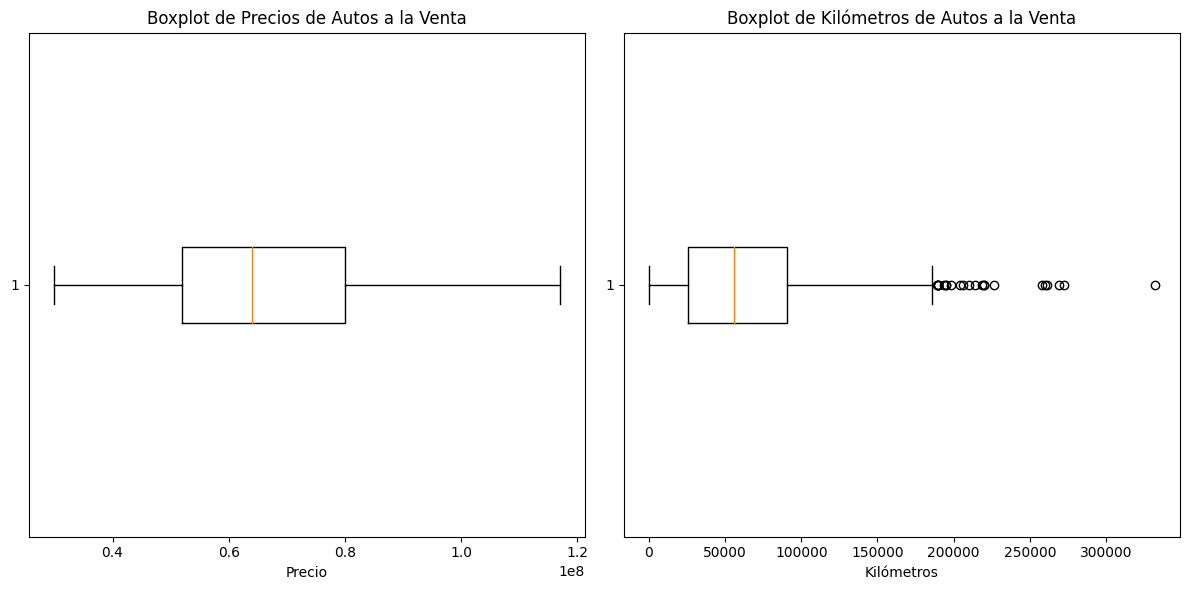

In [34]:
# Graficar boxplot
plt.figure(figsize=(12, 6))

# Boxplot de precios
plt.subplot(1, 2, 1)
plt.boxplot(price, vert=False)
plt.title('Boxplot de Precios de Autos a la Venta')
plt.xlabel('Precio')

# Boxplot de kilómetros
plt.subplot(1, 2, 2)
plt.boxplot(kms, vert=False)
plt.title('Boxplot de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

In [35]:
# Calcular las funciones de densidad de probabilidad (PDF) con pseudocuenta
pdf_price = (hist_price + pseudocount) * np.diff(bins_price)
pdf_kms = (hist_kms + pseudocount) * np.diff(bins_kms)

# Calcular la divergencia Kullback-Leibler
kl_divergence = entropy(pdf_price, pdf_kms)
print(f'Divergencia Kullback-Leibler entre Price y Kms: {kl_divergence}')

Divergencia Kullback-Leibler entre Price y Kms: 1.4424032849076


### Ejercicio complementario
Utilizando la técnica de Webscraping, descargue datos de otro tipo de vehículo que se encuentre a la venta. Replique el caso de estudio para los datos de precios y kilómetros del otro tipo de vehículo. Posteriormente compare las dos variables de ambos tipos de vehículos aplicando la divergencia KL. A continuación, se plantean dos preguntas asociadas a las actividades planteadas en las actividades propuestas en este ejercicio complementario del caso de estudio #2:

1. ¿Existen diferencias significativas entre las distribuciones de probabilidad de los precios y kilómetros del segundo tipo de automóvil estudiado? Explique en detalle los posibles factores que podrían afectar el resultado, con base a los datos descargados mediante webscraping.

2. ¿Cuáles son los resultados obtenidos por la evaluación de la diferencia entre las distribuciones del kilometraje de ambos tipos de autos (Duster con los datos del caso de estudio vs los datos descargados del segundo tipo de automóvil)? Investigue sobre otras técnicas para evaluar la diferencia absoluta en los valores del kilometraje entre dos tipos de autos e implementa al menos dos distintas.
    
3. Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.

## Referencias

[1] Badii, M., & Castillo, J. (2009). Distribuciones probabilísticas de uso común (Probabilistic distributions of common use). Daena: International Journal of Good Conscience, 4(1), 149–178. http://www.spentamexico.org/v4-n1/4%281%29%20149-178.pdf